# Principal Component Analysis (PCA) :
* PCA algorithm used to compress a dataset onto a lower-dimensional feature subspace with the goal of maintaining most of the relevant information.
* Dimensionality reduction is way to reduce the complexity of a model and avoid overfitting.  
* its also called as Max variance method

In [1]:
#importing libraries 
#pandas for loading data and manipulation
#numpy for working with multidimensional arrays and matrices
#searborn and matplotlib is used for data visualization
#sklearn is machine learning library where all the methods related to ML algorithms can be imported
#Metrics is used to measure accuracy score

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib

#Loading the MNIST dataset into dataframe d0
d0=pd.read_csv('/Users/Manish/downloads/mnist_train.csv')


Using matplotlib backend: Qt5Agg


In [4]:
l=d0['label'] #Assigning labels to l
#print(d0.head())
d=d0.drop("label",axis=1) #Preprocessing[dropping label column from the dataframe]
d.shape #printing shape of the dayaframe d


(42000, 784)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  This is separate from the ipykernel package so we can avoid doing imports until


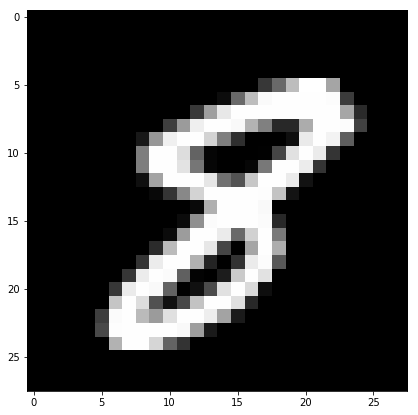

In [3]:
plt.figure(figsize=(7,7))#plotting figure of size 7*7(l*b)
idx=4000
grid_data=d.iloc[idx].as_matrix().reshape(28,28) #getting the value of 4000th index and reshaping into 28*28 matrix
plt.imshow(grid_data,interpolation='none',cmap='gray') #imshow is used for showing images

In [4]:
labels=l.head(15000) #Taking first 15000 values into labels
data=d.head(15000)
data.shape

(15000, 784)

In [5]:
#Performing Column standarization
from sklearn.preprocessing import StandardScaler
standardized_data=StandardScaler().fit_transform(data)
standardized_data.shape

(15000, 784)

In [6]:
#Finding covariance matrix
sample_data=standardized_data
cov_matrix=np.matmul(sample_data.T,sample_data)
cov_matrix.shape

(784, 784)

In [7]:
#Finding eighan values and eighan vectors
from scipy.linalg import eigh
values,vectors=eigh(cov_matrix, eigvals=(782,783))
vectors.shape
vectors=vectors.T
vectors.shape

(2, 784)

In [8]:
#assigning new coordinates by matrix mutliplication of eighan vectors and transpose of sample data 
new_coordinates=np.matmul(vectors,sample_data.T)
new_coordinates.shape

(2, 15000)

In [9]:
#We are trying to stack the values into dataframe to show prinicpal components
new_coordinates=np.vstack((new_coordinates,labels)).T
dataframe=pd.DataFrame(data=new_coordinates,columns=("1stPrincipal","2nd Principal","Label"))
dataframe.head()

,1stPrincipal,2nd Principal,Label
0,-5.558661,-5.043558,1.0
1,6.193635,19.305278,0.0
2,-1.909878,-7.678775,1.0
3,5.525748,-0.464845,4.0
4,6.366527,26.644289,0.0


In [10]:
new_coordinates.shape

(15000, 3)

In [11]:
labels.shape

(15000,)

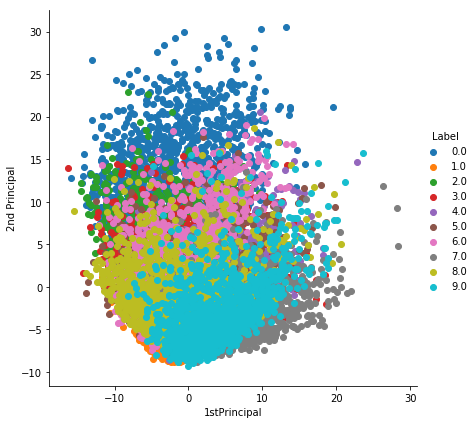

In [12]:
#Plotting the dataframe which was 786 dimensions into 2 dimension

import seaborn as sns
sns.FacetGrid(dataframe, hue="Label",height=6).map(plt.scatter,'1stPrincipal','2nd Principal').add_legend()
plt.show()

* we can see the plotting how we have converted 786 dimension into 2D dimension using principal component analysis.Using dimensional reduction we can visualize any N dimension into 2d and 3d etc.